<a href="https://colab.research.google.com/github/monicasjsu/deep_learning/blob/master/keras_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

print(tf.__version__)

2.1.0


Using TensorFlow backend.


In [3]:
images = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)


In [5]:
# number of classes
k = len((y_train))
print(k)


50000


In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

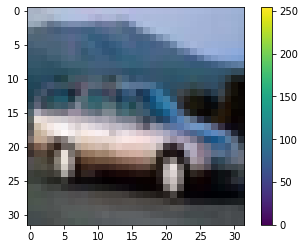

In [9]:
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
x_train = x_train / 255.0

x_test = x_test / 255.0

In [0]:
class_names = {0 : 'airplane', 1 : 'automobile', 2: 'bird', 3 : 'cat', 4 : 'deer', 5: 'dog', 6:'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


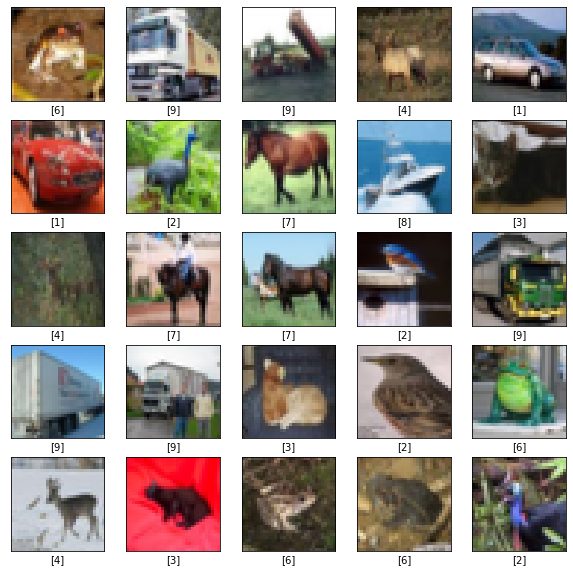

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    # plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:

model.fit(x_train, y_train, batch_size=32,epochs=10,shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 138us/sample - loss: 1.9024 - accuracy: 0.3202
Epoch 2/10
50000/50000 [==============================] - 5s 97us/sample - loss: 1.7423 - accuracy: 0.3740
Epoch 3/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.6883 - accuracy: 0.3963
Epoch 4/10
50000/50000 [==============================] - 5s 101us/sample - loss: 1.6553 - accuracy: 0.4123
Epoch 5/10
50000/50000 [==============================] - 5s 99us/sample - loss: 1.6364 - accuracy: 0.4158
Epoch 6/10
50000/50000 [==============================] - 5s 97us/sample - loss: 1.6249 - accuracy: 0.4205
Epoch 7/10
50000/50000 [==============================] - 5s 91us/sample - loss: 1.6119 - accuracy: 0.4275
Epoch 8/10
50000/50000 [==============================] - 4s 90us/sample - loss: 1.6013 - accuracy: 0.4308
Epoch 9/10
50000/50000 [==============================] - 5s 93us/sample - loss: 1.5944 - accuracy: 0.4316
Epoch 10/10

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 1.6470 - accuracy: 0.4165

Test accuracy: 0.4165


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(x_test)

In [20]:
predictions[0]

array([0.05046869, 0.05700542, 0.03496402, 0.24851462, 0.03241104,
       0.20100768, 0.07356904, 0.00869373, 0.27254596, 0.0208198 ],
      dtype=float32)

In [21]:
np.argmax(predictions[0])

8

In [22]:
x_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [56]:
np.argmax(predictions[0])

8

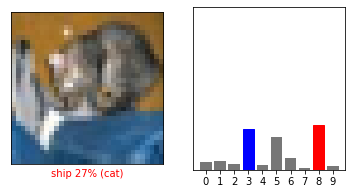

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test[0], x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test[0])
plt.show()

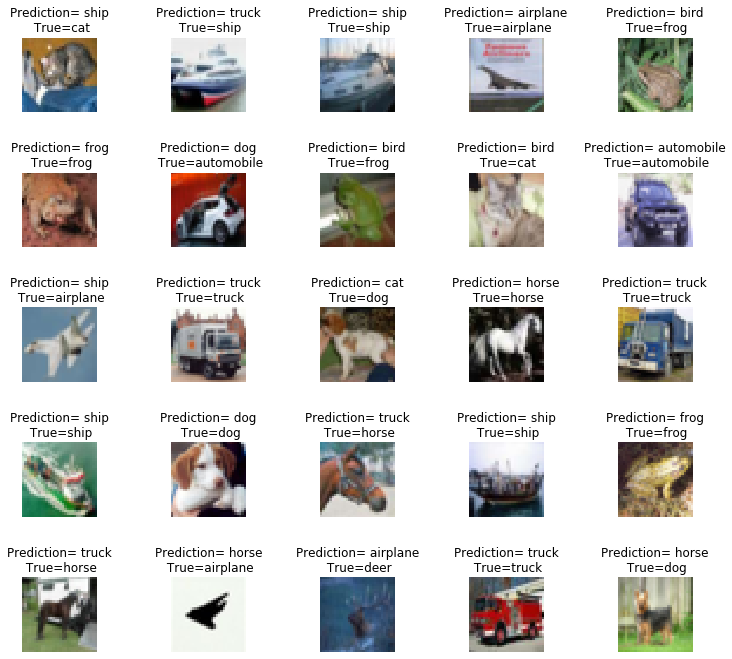

In [59]:
L=5
W=5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction= {}\n True={}'.format(class_names[np.argmax(predictions[i])], class_names[y_test[i][0]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)